# CocaCola_Sales

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #Single Exponential Smoothing
from statsmodels.tsa.holtwinters import Holt #Holt (Double) Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing #Holt Winter's (Triple) Exponential Smoothing
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from sklearn.metrics import mean_squared_error
import warnings
import itertools

In [ ]:
df = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')

In [ ]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [ ]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [ ]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [ ]:
df.shape

(42, 2)

In [ ]:
df.columns

Index(['Quarter', 'Sales'], dtype='object')

# Histogram and Density Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa36d2fde50>]],
      dtype=object)

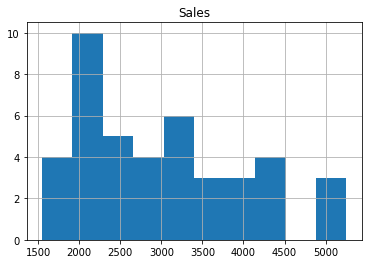

In [ ]:
df.hist()

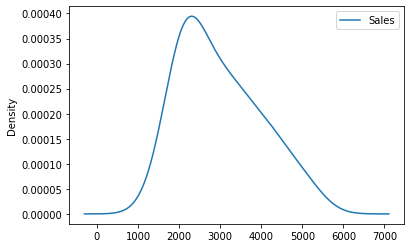

In [ ]:
df.plot(kind = 'kde')

# Box Plot

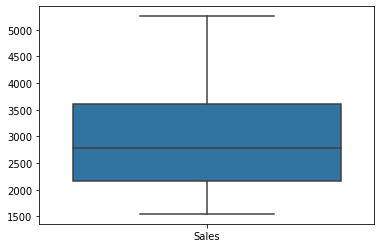

In [ ]:
sns.boxplot(data=df)

# Lag Plot

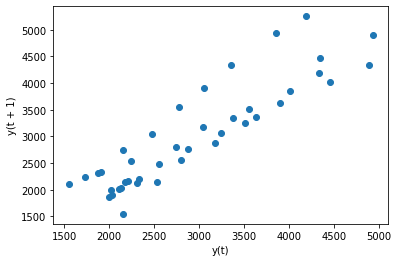

In [ ]:
pd.plotting.lag_plot(df['Sales'])

In [ ]:
len(df)

42

In [ ]:
df['quarter'] = 0
for i in range(42):
    p=df['Quarter'][i]
    df['quarter'][i]=p[0:2]

In [ ]:
df

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [ ]:
df['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [ ]:
df_dummies=pd.DataFrame(pd.get_dummies(df['quarter']),columns=['Q1','Q2','Q3','Q4'])
df1=pd.concat([df,df_dummies],axis= 1)

In [ ]:
df1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [ ]:
df1['t'] = np.arange(1,43)

In [ ]:
df1['t_squared'] = df1['t']**2

In [ ]:
df1['Sales_log'] = np.log(df['Sales'])

In [ ]:
df1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


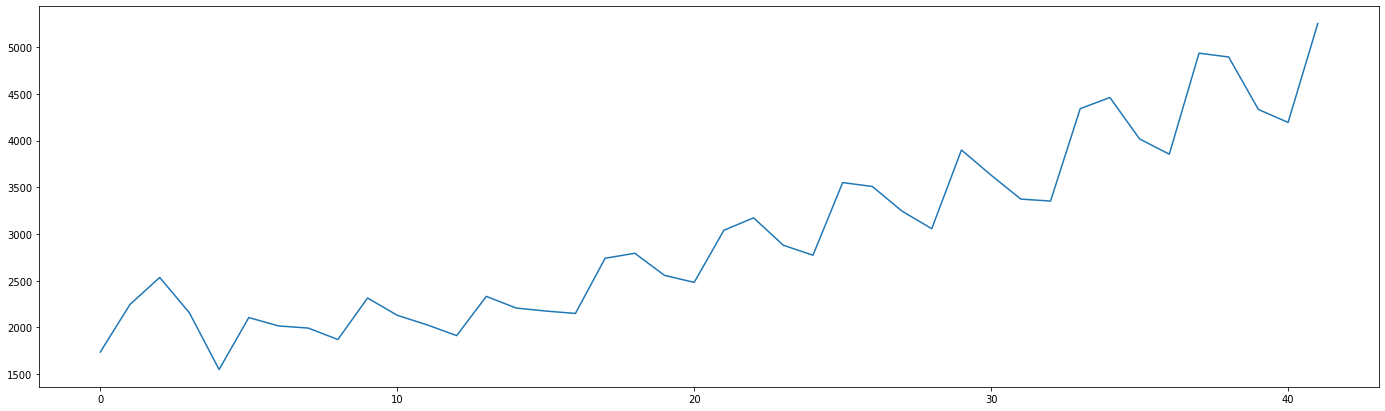

In [ ]:
plt.figure(figsize = (24,7))
df1['Sales'].plot()

# Splitting Data

In [ ]:
df1.shape

(42, 10)

In [ ]:
Train = df1.head(30)
Test = df1.tail(12)

In [ ]:
Train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [ ]:
Test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
30,Q3_93,3629.0,Q3,0,0,1,0,31,961,8.196712
31,Q4_93,3373.0,Q4,0,0,0,1,32,1024,8.123558
32,Q1_94,3352.0,Q1,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015


# Linear Model

In [ ]:
import statsmodels.formula.api as smf

linear_model = smf.ols("Sales~t",data = Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

714.0144483281302

# Exponential Model

In [ ]:
Exp = smf.ols("Sales_log~t",data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

552.2821039079249

# Quadratic Model

In [ ]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

646.2715428311276

# Compare the results 

In [ ]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp,552.282104
2,rmse_Quad,646.271543
0,rmse_linear,714.014448


Here the smallest error is given by Exponential Model

# Moving Average

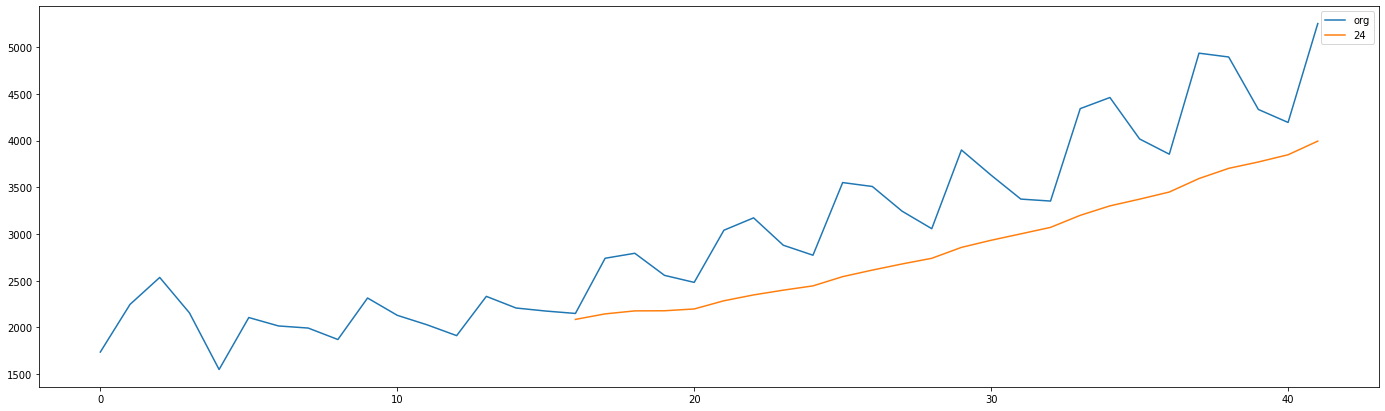

In [ ]:
plt.figure(figsize = (24,7))
df1['Sales'].plot(label = "org")
df1['Sales'].rolling(17).mean().plot(label = str(24)) # rolling(17) = means taking 17 monthly moving average
plt.legend(loc='best')

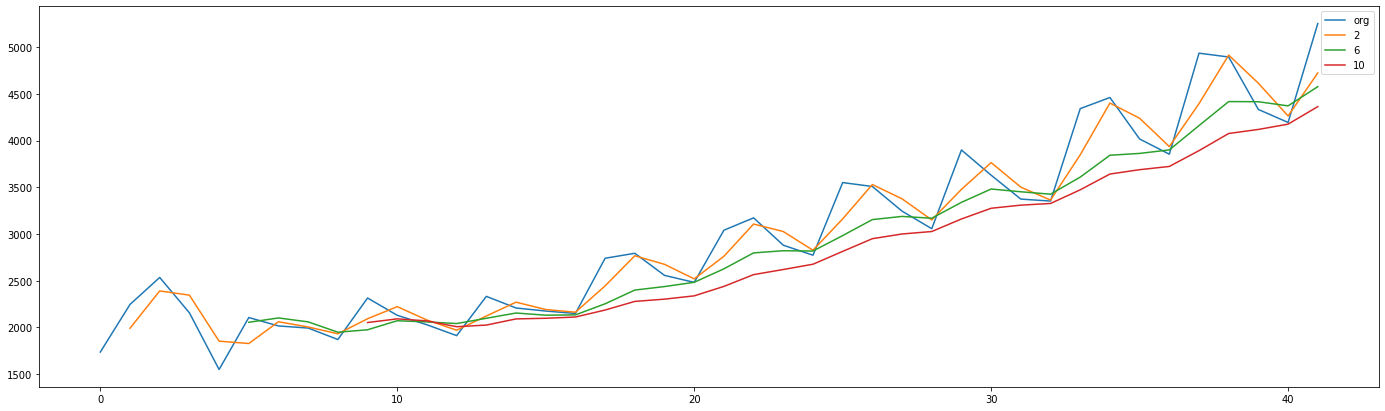

In [ ]:
plt.figure(figsize = (24,7))
df1['Sales'].plot(label = "org")
for i in range(2,12,4):
    df1['Sales'].rolling(i).mean().plot(label = str(i))
plt.legend(loc='best')

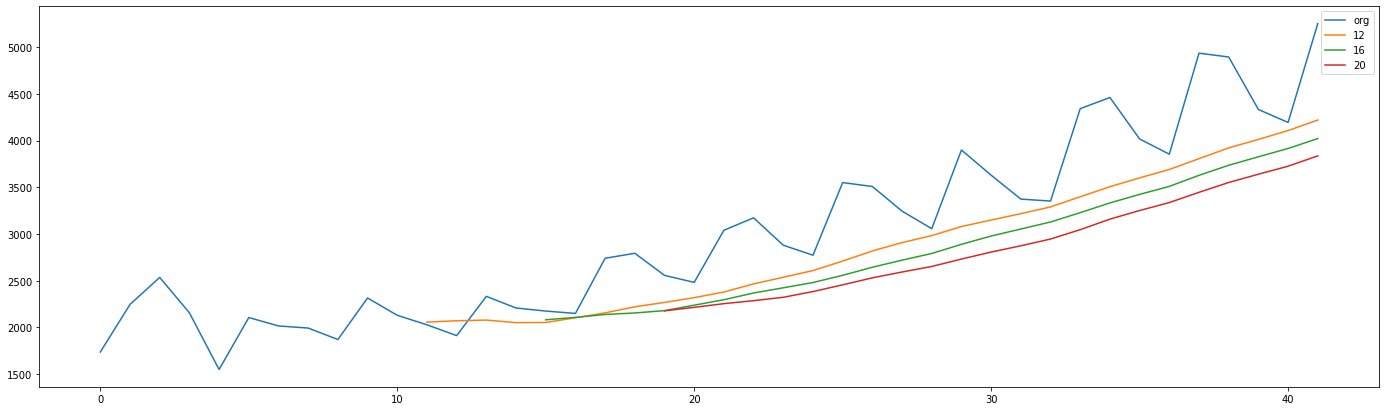

In [ ]:
plt.figure(figsize = (24,7))
df1['Sales'].plot(label = "org")
for i in range(12,24,4): 
    df1['Sales'].rolling(i).mean().plot(label = str(i))
plt.legend(loc='best')

# Time series decomposition plot

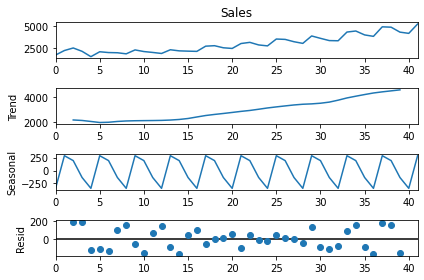

In [ ]:
decompose_ts_add = seasonal_decompose(df1['Sales'],period=4)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

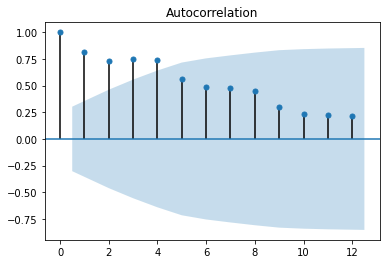

In [ ]:
tsa_plots.plot_acf(df1['Sales'], lags=12)
plt.show()

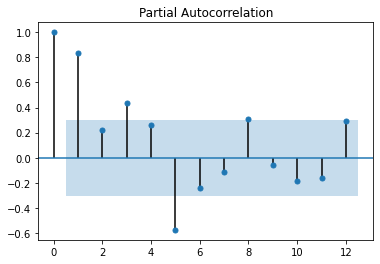

In [ ]:
tsa_plots.plot_pacf(df1['Sales'], lags=12)
plt.show()

# Evaluation Metric MAPE

In [ ]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method


In [ ]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.9)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

13.135678878613044

# Holt method 

In [ ]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

11.213841942210799

# Holts winter exponential smoothing with additive seasonality and additive trend

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

4.8280399061659445

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

4.338036354578027

# Final Model by combining train and test

In [ ]:
hwe_model_add_add = ExponentialSmoothing(df1.Sales,seasonal="mul",trend="add",seasonal_periods=4).fit()

# Forecasting for next 10 time periods

In [ ]:
hwe_model_add_add.forecast(10)

42    5230.277479
43    4664.901913
44    4502.458702
45    5740.272353
46    5629.584033
47    5014.374619
48    4833.560764
49    6154.780298
50    6028.890587
51    5363.847325
dtype: float64

# Using ARIMA Model

In [ ]:
data = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx',
                     header=0, 
                     index_col=0, 
                     parse_dates=True)
data

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


# Separate out a validation dataset

In [ ]:
split_point = len(data) - 10

dataset, validation = data[0:split_point], data[split_point:]

print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 32, Validation 10


In [ ]:
dataset.to_csv('dataset.csv',header = False)
validation.to_csv('validation.csv' , header=False)

In [ ]:
from pandas import read_csv

train = read_csv('dataset.csv',
                   header=None,
                   index_col=0,
                   parse_dates=True,
                   squeeze=True)
train

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Name: 1, dtype: float64

# Prepare data

In [ ]:
X = train.values
X

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ])

In [ ]:
X = X.astype('float32')
X

array([1734.827 , 2244.961 , 2533.805 , 2154.963 , 1547.819 , 2104.412 ,
       2014.363 , 1991.747 , 1869.05  , 2313.632 , 2128.32  , 2026.829 ,
       1910.604 , 2331.165 , 2206.55  , 2173.968 , 2148.278 , 2739.308 ,
       2792.754 , 2556.01  , 2480.9739, 3039.523 , 3172.116 , 2879.001 ,
       2772.    , 3550.    , 3508.    , 3243.86  , 3056.    , 3899.    ,
       3629.    , 3373.    ], dtype=float32)

In [ ]:
train_size = int(len(X) * 0.50)
train_size

16

In [ ]:
train,test = X[0:train_size], X[train_size:]

In [ ]:
train

array([1734.827, 2244.961, 2533.805, 2154.963, 1547.819, 2104.412,
       2014.363, 1991.747, 1869.05 , 2313.632, 2128.32 , 2026.829,
       1910.604, 2331.165, 2206.55 , 2173.968], dtype=float32)

In [ ]:
test

array([2148.278 , 2739.308 , 2792.754 , 2556.01  , 2480.9739, 3039.523 ,
       3172.116 , 2879.001 , 2772.    , 3550.    , 3508.    , 3243.86  ,
       3056.    , 3899.    , 3629.    , 3373.    ], dtype=float32)

# **Checking Stationarity of the data**

### **Ho : The data is not stationary**

### **H1 : The data is stationary**

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(data['Sales'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                  1.309421
p-value                         0.996661
#lags used                      7.000000
number of observations used    34.000000
critical value (1%)            -3.639224
critical value (5%)            -2.951230
critical value (10%)           -2.614447
dtype: float64


#### Here the test statistics is greater than critical value so we reject null hypothesis and conclude that the data is stationary

# Walk-Forward Validation

In [ ]:
history = [x for x in train]
history

[1734.827,
 2244.961,
 2533.805,
 2154.963,
 1547.819,
 2104.412,
 2014.363,
 1991.747,
 1869.05,
 2313.632,
 2128.32,
 2026.829,
 1910.604,
 2331.165,
 2206.55,
 2173.968]

In [ ]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1] # -1 is the last value
    predictions.append(yhat)
    
# observation
    obs = test[i]
    history.append(obs)
    
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=2173.968, Expected=2148.278
>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000


# Report Performance

In [ ]:
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 387.510


# ARIMA Hyperparameters

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
# make predictions
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(history, order = arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[i])
        
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Grid search for p, d, q values

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p,d,q in itertools.product(p_values, d_values, q_values):
    #for p in p_values:
        #for d in d_values:
            #for q in q_values:
                order = (p,d,q)
                try:
                  rmse = evaluate_arima_model(train, order)
                  if rmse < best_score:
                      best_score, best_cfg = rmse, order
                      print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# load data
train = pd.read_csv('dataset.csv',
                    header = None,
                    index_col=0,
                    parse_dates=True,
                    squeeze=True)
train

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Name: 1, dtype: float64

In [ ]:
# evaluate parameters
p_values = range(0,5)
d_values = range(0,5)
q_values = range(0,5)

In [ ]:
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=840.937
ARIMA(0, 0, 1) RMSE=617.580
ARIMA(0, 0, 2) RMSE=454.530
ARIMA(0, 1, 0) RMSE=387.510
ARIMA(0, 1, 2) RMSE=378.536
ARIMA(0, 1, 3) RMSE=348.378
ARIMA(2, 1, 0) RMSE=320.952
ARIMA(2, 1, 2) RMSE=298.858
ARIMA(2, 2, 3) RMSE=267.468
ARIMA(3, 1, 1) RMSE=241.510
ARIMA(3, 1, 2) RMSE=227.770
ARIMA(3, 2, 0) RMSE=149.712
Best ARIMA(3, 2, 0) RMSE=149.712


# Build Model based on the optimized values

In [ ]:
# Load data
train = pd.read_csv('dataset.csv', 
                    header =0, 
                    index_col =0, 
                    parse_dates = True)
train

,1734.8269996643066
Q1_86,
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999
Q2_88,2313.631996


In [ ]:
# Prepare data
X = train.values
X = X.astype('float32')

In [ ]:
#fit model
model = ARIMA(X, order = (3,2,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 20)
forecast

array([3296.84521255, 4072.01034333, 3756.42108521, 3513.57319613,
       3535.85606726, 4237.6289131 , 3882.66037742, 3664.88930548,
       3771.89715533, 4396.16836338, 4009.23919973, 3826.10693122,
       4003.95071048, 4548.13526925, 4137.49576542, 3996.26045794,
       4231.13755481, 4694.19556658, 4268.57385555, 4174.28837967])

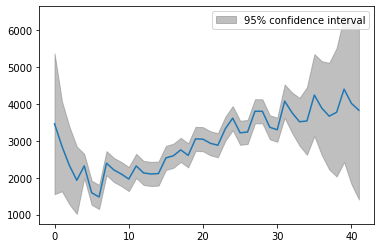

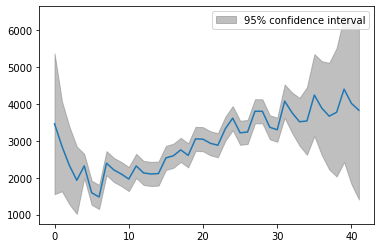

In [ ]:
# fit model
from statsmodels.graphics.tsaplots import plot_predict

model = ARIMA(X, order=(3,2,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
plot_predict(model_fit,1, 42)

In [ ]:
#Error on the test data
val=pd.read_csv('validation.csv',header = None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

616.3017826395019

# Combine train and test data and build final model

In [ ]:
from pandas import read_excel

# fit model
data = read_excel('/content/CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [ ]:
model = ARIMA(X, order = (3,2,0))
model_fit = model.fit()

In [ ]:
forecast = model_fit.forecast(steps = 10)
forecast

array([3296.84521255, 4072.01034333, 3756.42108521, 3513.57319613,
       3535.85606726, 4237.6289131 , 3882.66037742, 3664.88930548,
       3771.89715533, 4396.16836338])

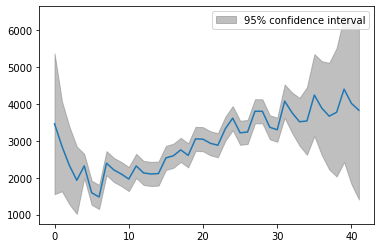

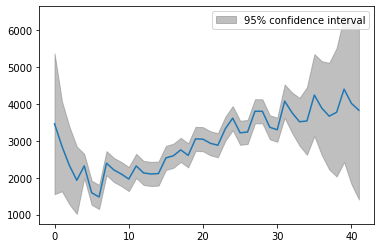

In [ ]:
plot_predict(model_fit,1, 42)